# Flatiron Data Science Project 1: The King County Housing Data Set
### Matthew Freeman - 8th March 2019

#### Note: This code is written in Python 3 and should be executed using the "Python 3" kernel.
***

The project will use data science methods in the Python 3 language to explore the King County Housing Data Set. This data set contains real data points on house sale prices between May 2014 and June 2015 within King County, WA, U.S.A. and some house details which may or may not have influenced pricing. This investigation shall be using a multivariate linear regression to try to create a model which can predict house prices from these added details, and will also attempt to answer three questions posed by myself below.

> #### <font color=red> Question A: What can be inferred about this data set from its exposure to misfitting?
> 
> #### <font color=blue> Question B: Where are the higher valued houses in King County located AND how best can I improve my model with location related data?
> 
> #### <font color=green> Question C: How much more accurate can a price prediction be based on a multivariate linear regression rather than just the government assigned "grade"?

<br>

This investigation will roughly follow the **OSEMN** data science process, with some iteration and backward steps being employed where investigation requires it. This means that I will be trying to carry out the investigation in five steps: <br><br> First, I shall Obtain the data: gathering whatever is needed from the required sources. <br> Second, I shall Scrub the data set: finding missing or incorrectly labelled data points and preparing the data for the best analysis possible. <br> Third, I shall Explore the dataset: looking for patterns and anomalies across statistical distributions and correlations which can inform my investigation strategy. <br> Fourth, I shall Model the data: iterating different models to settle on one with the most significant predictive power and using appropriate methods to check validity. <br> Fifth, and finally, I shall iNterpret the results of our investigation: I shall discuss their predictive reliability and  their success in answering the questions.

***

## Step 1: Obtain

##### Aims: Import libraries and functions to be used throughout investigation; detail kernel used; apply any plotting settings; and most importantly, store data set in a dataframe for easy manipulation.

In [1]:
# Note: This code is written in Python 3 using the "Python 3" kernel.

# Import pandas for dataframe usage.
import pandas as pd
# Import matplotlib.pyplot for basic plotting.
import matplotlib.pyplot as plt
# Import seaborn for advanced plotting and plot styling.
import seaborn as sns
# Import numpy for mathematical functions.
import numpy as np
# Import general statsmodels api
import statsmodels.api as sm
# Import statsmodels for statistics functions.
import statsmodels.formula.api as smf

# Set plotting style and appearance magic.
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# The data set is saved as kc_house_data.csv within this directory. I shall read it into a Pandas dataframe.
kc_df = pd.read_csv('kc_house_data.csv')

## Step 2: Scrub

##### Aims: Look through data for missing values, mislabelled data, poorly captured data points or categories, etc.; seek most appropriate solution; fix data as best possible.
<br><br>
This data set is small enough in size that I am confident it would be possible to get a good feel for it by displaying the first few rows.

In [3]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Now let's check the column data types and sizes, as well as see all the variables available to us.

In [4]:
 kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Interesting. There are 21 columns and I can see already that some are not in the correct data type or are shorter than others. Let's go through these columns in detail.

**id**: This variable relates to numbers identifying the property sold. As we have no key relating to these properties id codes, or any knowledge of methodology in assigning these id codes, we can remove this column as it is useless to us. We can simply rely on the pandas index for this dataframe for such a purpose.

**date**: This variable contains dates, entered in a text format. Dates can be most easily understood by python if they are reformatted into a purely numerical date format, which pandas functionality exists to allow. There may likely also be incorrectly written dates in this column which we must check for and deal with as best as possible.

**price**: This variable contains assumedly USD sale prices for the properties. They are mostly rounded to 1 decimal place which is an odd choice when most properties have a price rounded to the nearest hundred or thousand dollars anyway. After better understanding how erroneous data points may be included it would be preferable to round up to the nearest dollar as it would look neater in plots and a single decimal point is no more correct a rounding choice. 
This variable is the PREDICTION TARGET and should also be copied into a separate pandas series for later use.

**bedrooms**: This variable contains low integers representing the number of bedrooms in the house sold. Thankfully the data type of the series seems appropriate for this. As long as there are no mistakenly high or low numbers this may be as accurate as possible.

**bathrooms**: This variable should be the same as the bedrooms variable, but for the number of bathrooms. Sadly, the series data type seems to be including more than just integers as it is a floating point. This should be fixed.

**sqft_living, sqft_lot**: These variables are for the square foot area of the living space and lot, respectively. They are recorded as appropriately sized integers so they should probably not require much scrubbing.

**floors**: This variable is the number of floors in the house. This series seems to be recorded as a floating point number. I think it should be an integer but I'll check to see if there are lots of cases with mezzanines or something like that before fixing.

**waterfront**: This variable records whether the house has a view of the waterfront. This should be a boolean variable but it currently is not. It also has some records missing. Those with waterfront views should be a minority so I shall probably set any missing or unclear data points to be False.

**view**: This variable represents whether the property has been viewed or not. I would think that this should be boolean and True for most properties. This has a different data type right now so I should probably fix that after checking if my assumption is correct. There are also a few missing values which could probably be replaced with the series mode.

**condition**: This variable represents the condition of the property. All I can tell is that it is currently an integer type so I shall look at this further.

**grade**: Like condition but from a County assigned grading system. Seemingly 1-10?

**sqft_above, sqft_basement**: Square footage, again like earlier but for the house excluding and basement, and for just the basement. It looks like many houses will have a zero classification for sqft_basement because they have no basement. sqft_basement could also use being recast as an integer type.

**yr_built, yr_renovated**: yr_built should just be a year when the house was built. These are integers, which is fine for our purposes. yr_renovated is the year of most recent renovation. This should be recast from floating to integers. There are many missing values but not enough to ignore the entire series. Houses built in certain years will have a distribution of renovation years depending on the built year. We might be able to glean from looking at these distributions whether we could just use a mean for the year built. Or it might be the case that missing values are almost all for very recently built houses, in which case they might never have been renovated. There may be multicolinearity problems with these columns. This will require further investigation.

**zipcode**: This is the zipcode of the property. This is a classification which should be put into a one-hot format, possibly with bunching if that can be reasonably approved. I am not sure how well these variables will work in the model. This variable currently has the correct integer type and no missing values.

**lat, long**: More location related information. These are floating point numbers, and rightly so, representing latitude and longitude vectors of the property's location. No missing data points. I suspect these will not work well for linear representation but could work well with some kind of radial dimension to be worked out. An additional option should be calculated and added to our independant variables.

**sqft_living15, sqft_lot15**: These are the square footage integers for living space and lot space for the closest 15 neighbours. I suspect these are valuable columns which may be even more valuable in some kind of function as well or instead of. Further investigation needed.

#### In the below cells I shall check the validity of each series of data points and their distributions and fix any bad data as suggested above.
<br><br>
#### id
This column of the dataframe shall simply be removed.


In [5]:
kc_df.drop('id', axis=1, inplace=True)

<br><br>
#### date
Convert from text to a date format, check for errors.

Text(0, 0.5, 'Frequency')

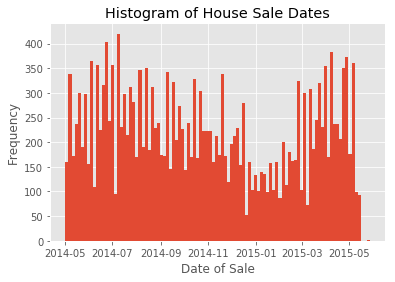

In [6]:
kc_df.date = pd.to_datetime(kc_df.date)
# Visually check all correct dates within our range with histogram.
kc_df.date.hist(bins=100)
plt.title('Histogram of House Sale Dates')
plt.xlabel('Date of Sale')
plt.ylabel('Frequency')

Not sure if any of those last few dates erroneously cross outside of our May 2015 end date for this data set. Let's check.

In [7]:
kc_df.nlargest(5, 'date')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16580,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0.0,0.0,5,8,2440,1310.0,1924,0.0,98115,47.6747,-122.303,2170,4590
13040,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0.0,0.0,3,6,720,670.0,1941,0.0,98115,47.6914,-122.308,920,6380
5632,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0.0,0.0,3,7,1870,0.0,1960,0.0,98007,47.5951,-122.144,1870,7650
927,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0.0,0.0,3,8,1080,290.0,2009,0.0,98133,47.7052,-122.343,1370,1090
6191,2015-05-14,1700000.0,5,3.00,3320,5354,2.0,NaN,0.0,3,9,3320,0.0,2004,0.0,98103,47.6542,-122.331,2330,4040


That worked well. I see no unusual dates to correct.
<br><br>
#### price
Visual check for errors, then round to integer and cast as integer type.

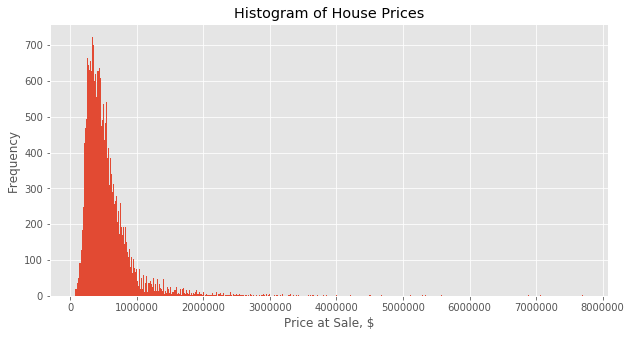

In [8]:
fig = plt.figure(figsize = (10,5))
kc_df.price.hist(bins=500)
plt.title('Histogram of House Prices')
plt.xlabel('Price at Sale, $')
plt.ylabel('Frequency')
kc_df.price = kc_df.price.astype(int)
plt.show()

That looks like what I would expect. If the prices on the extreme high end are indeed anomalous we should be able to tell by looking at the rows for the largest few of them.

In [9]:
kc_df.nlargest(5, 'price')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,2014-10-13,7700000,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,2014-06-11,7060000,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,2014-09-19,6890000,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2014-08-04,5570000,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,2015-04-13,5350000,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750


These houses are large enough by floors and rooms, they also have a very high "grade". I am sure there are some houses this expensive in the Seattle area so this is perfectly acceptable.
<br><br>
#### bedrooms
Check for no erroneously high or low numbers, otherwise fine to be left alone.

In [10]:
kc_df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Above data looks okay, let's just check that 33 bedroom house has appropriate properties correct for a mega mansion.

In [11]:
kc_df.loc[kc_df.bedrooms == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014-06-25,640000,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


This bedroom number doesn't make sense for this property and it also has erroneous yr_renovated data so I shall remove this row. There is nothing more to scrub for this column.

In [12]:
kc_df.drop([15856], inplace=True)

<br><br>
#### bathrooms
Check value counts and then try to cast to integer.

In [13]:
kc_df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

It looks like I was wrong about this data as everything seems to be rounded to the nearest quarter. Unless the data was collected incorrectly I think I can assume that this is correct and should be left alone as it is still perfectly usable as is.
<br><br>
#### sqft_living, sqft_lot
Just visually check for erroneously large or small values in these two columns. I would make a histgram with overlapping variables but the Area scales would not match up for a good visual check. Instead I shall plot them separately in a subplot.

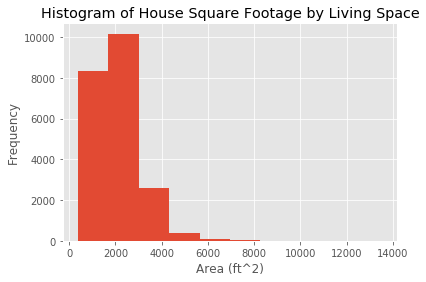

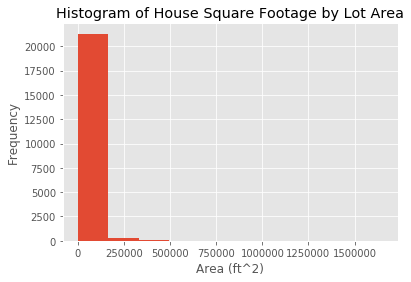

In [14]:
kc_df.sqft_living.plot(kind='hist')
plt.title('Histogram of House Square Footage by Living Space')
plt.xlabel("Area (ft^2)")
plt.ylabel('Frequency')
plt.show()

kc_df.sqft_lot.plot(kind='hist')
plt.title('Histogram of House Square Footage by Lot Area')
plt.xlabel("Area (ft^2)")
plt.ylabel('Frequency')
plt.show()

The above series do not need scrubbing.
<br><br>
#### floors
See what values exist and cast to integer if reasonable.

In [15]:
kc_df.floors.value_counts()

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Looks like lots of people have mezzanines. That is fine, we can leave this data as it is.
<br><br>
#### waterfront
This should probably be boolean. There are also missing values. Let's check if it should be boolean based on what values are already used and fill any missing values with False, if that is the mode, as most houses probably aren't on the waterfront.

In [16]:
kc_df.waterfront.value_counts()

0.0    19074
1.0      146
Name: waterfront, dtype: int64

Yes, this looks to be the case. The sum of values, 19,220 is also less than the column length 21,596. So I shall fill missing values with False, cast the column to boolean type, and then check the value counts again.

In [17]:
kc_df.waterfront.fillna(value=False, inplace=True)
kc_df.waterfront = kc_df.waterfront.astype(bool)
kc_df.waterfront.value_counts()

False    21450
True       146
Name: waterfront, dtype: int64

That is better.
<br><br>
#### view
This should be quite similar to how we dealt with waterfront. Check the values first.

In [18]:
kc_df.view.value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

I'll admit, the key for this data set doesn't describe this well enough. The only thing which seems wrong are the missing values noticed earlier and the type being floating point. I'll fix (set to significantly largest mode) and check those now, as well as recast the type.<br>
It might be best to bin classifications for non-zero before one-hot encoding later.

In [19]:
kc_df.view.fillna(value=0.0, inplace=True)
kc_df.view = kc_df.view.astype(int)
kc_df.view.value_counts()

0    19484
2      957
3      508
1      330
4      317
Name: view, dtype: int64

That is better.
<br><br>
#### condition
This should probably be fine, I'll just check values.

In [20]:
kc_df.condition.value_counts()

3    14020
4     5677
5     1700
2      170
1       29
Name: condition, dtype: int64

Ok, a 1-5 scale is fine.
<br><br>
#### grade
This should be like the above, but I believe it is a 1-10 scale. Let's check.

In [21]:
kc_df.grade.value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

Interesting. This is probably like a 1-15 scale which happens to have no extreme values. Data looks quite normal so I am happy to leave this as is.
<br><br>
#### sqft_above
This should be fine. Let's just check there are no erroneously high or low values in a histogram.

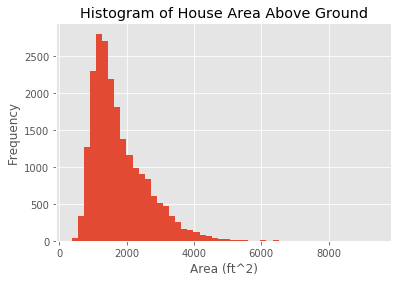

In [22]:
kc_df.sqft_above.hist(bins=50)
plt.title('Histogram of House Area Above Ground')
plt.xlabel("Area (ft^2)")
plt.ylabel('Frequency')
plt.show()

That looks fine.
<br><br>
#### sqft_basement
I shall check for strange values which may be getting in the way of this being cast into an integer, and then do so once any necessary fixes are carried out.

Here I shall see, side-by-side, what the differences made to the column are when I force the strings into integers with errors forced into set to 0 values.

In [23]:
new_basement = pd.to_numeric(kc_df.sqft_basement, errors='coerce').fillna(0).astype(np.int32)
# Here I have forced the column into a numeric format with the option given to force errors into 0. The type is set to integer.
old_basement = kc_df.sqft_basement
pd.concat([new_basement, old_basement], axis=1).transpose()
# The edited version will appear in the upper row, the old version in the lower row.

,0,1,2,3,4,5,6,7,8,9,...,21587,21588,21589,21590,21591,21592,21593,21594,21595,21596
sqft_basement,0,400,0,910,0,1530,0,0,730,0,...,0,0,0,910,130,0,0,0,0,0
sqft_basement,0.0,400.0,0.0,910.0,0.0,1530.0,?,0.0,730.0,0.0,...,0.0,0.0,0.0,910.0,130.0,0.0,0.0,0.0,0.0,0.0


It seems that all values can easily be cast as integers except for some question mark values. These would probably have been used to note that the data collector was unsure about the answer because there was no basement to measure. i.e. 0. Even if that was not the case, it would still be reasonable to set these cells to 0 as it is by far the mode for the column.

I will be happy to set the column to the new values as tested above and leave it at that.

In [24]:
kc_df.sqft_basement = new_basement

<br><br>
#### yr_built, yr_renovated
I want to look at these two variables together as the yr_renovated column is missing many values, but as mentioned earlier, this may be due to a lack of renovation for newer properties. In this case I would set the yr_renovated value to the yr_built value.

Let's display them together as a two column dataframe like we did for sqft_basement.

In [25]:
kc_df[['yr_built', 'yr_renovated']].transpose()

,0,1,2,3,4,5,6,7,8,9,...,21587,21588,21589,21590,21591,21592,21593,21594,21595,21596
yr_built,1955.0,1951.0,1933.0,1965.0,1987.0,2001.0,1995.0,1963.0,1960.0,2003.0,...,2003.0,2014.0,2014.0,2009.0,2008.0,2009.0,2014.0,2009.0,2004.0,2008.0
yr_renovated,0.0,1991.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Wow. That is astonishingly bad data. I would think more old houses would have been renovated then those. It is a shame, because renovations make a big difference to house prices and it is more of a relative term than binary. Nevertheless, I shall fill the missing values with zero, change the data type of yr_renovated to integer (yr_built only shows up as floating point above because it is alongside yr_renovated), and then consider how to model this poor data column later.

In [26]:
kc_df.yr_renovated.fillna(0.0, inplace=True)
kc_df.yr_renovated = kc_df.yr_renovated.astype(int)

<br><br>
#### zipcode
I do not know everything about zip codes in Washington but I believe some buildings or areas will share the same 5 digit code. It might be useful to make one-hot coded classifications for these later on, but not if there are thousands of classifications. I shall check how many unique values there are.

In [27]:
kc_df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

OK, so there are 70 zip codes for 21,596 properties. That means each zip code covers a mean of 308 properties. That is a lot of classifications but our model should be capable of handling it. We can choose to one-hot encode it, or do something else, later. Otherwise this columns data seems fine.
<br><br>
#### lat, long
These two variables do not require scrubbing and will be further investigated later on anyway as part of answering one of my questions.
<br><br>
#### sqft_living15, sqft_lot15
These two variables also do not require scrubbing and will be further investigated later on if I decide to model them in an unusual way.

<br><br>

###### That reaches the end of my scrubbing tasks. Some points for further investigation were noted. I should check once more the information for the dataframe we will be using.

In [28]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
date             21596 non-null datetime64[ns]
price            21596 non-null int32
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null bool
view             21596 non-null int32
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null int32
yr_built         21596 non-null int64
yr_renovated     21596 non-null int32
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(4), int32(4), int64(10)
memory usage: 3.6 MB


That looks great. Now onto the data exploration.
<br><br>

<br><br>
## Step 3: Explore

##### Aims: Check statistical measures of data set variables, analyse distributions of data set variables, locate anomalies, and consider different uses for variables.

<br>

##### I need to complete 3 things in my exploration. 
1) Find any possible mulitcollinearity problems and deal with them. <br>
2) Analyse distributions of data and find best way of selecting features. <br>
3) Further visualise data relating to location, to help with answering question B.

<br>

#### Multicollinearity management
Okay, the best chart for looking at correlations between variables is the correlations matrix heat map.

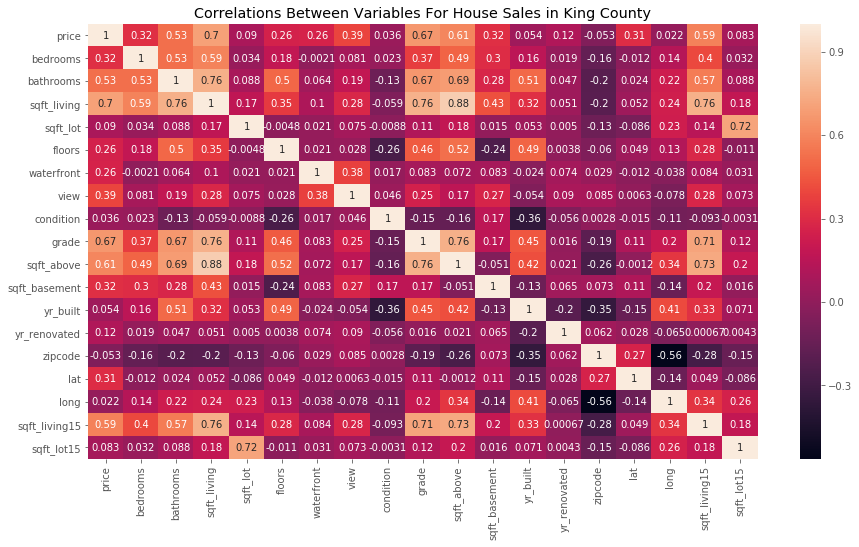

In [29]:
corr = kc_df.corr()
fig = plt.figure(figsize = (15,8))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
ax.set_title("Correlations Between Variables For House Sales in King County")
plt.show()

Looking at the correlations above I shall ignore those involving price and note anything greater than or equal to 0.7.

1) sqft_living - bathrooms: 0.76 <br>
2) grade - sqft_living: 0.76 <br>
3) sqft_above - sqft_living: 0.88 <br>
4) sqft_living15 - sqft_living: 0.76 <br>
5) sqft_lot15 - sqft_lot: 0.72 <br>
6) sqft_above - grade: 0.76 <br>
7) sqft_living15 - grade: 0.71 <br>
8) sqft_living15 - sqft_above: 0.73 <br>
 <br>
This many pair-wise correlations is a problem. To avoid multicollinearity increasing the model's standard deviation unnecessarily I will have to exclude some of these variables. It would be most efficient to remove those variables highly correlated with many other things. sqft_living is strongly correlated with 4 other variables. sqft_living15 is strongly correlated with 3 other variables. Removing those variables cuts out 6 of the 8 strong correlations. I shall also remove sqft_above as the information contained here should be closely repeated in bed/bathrooms and floors. This leaves one other strong correlation, that being sqft_lot15-sqft_lot. I don't want to completely get rid of the neighbourhood comparison information so I shall instead make a new variable with it.

The lots of the house and it's neighbours are obviously going to correlate as houses built together tend to be similar. However, there is useful information in knowing just how different from the mean the difference might be. 
I shall look at a scatter graph and some statistical data for more detail on these two variables and how they relate.

In [30]:
print(kc_df.sqft_lot15.describe())
print(kc_df.sqft_lot.describe())

count     21596.000000
mean      12758.656649
std       27275.018316
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64
count    2.159600e+04
mean     1.509983e+04
std      4.141355e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.619000e+03
75%      1.068550e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64


Interesting detail here: you'll notice that the average house selling is slightly larger than it's neighbours. This most likely means that the larger houses in neighbourhoods are sold for often! Now, to that scatter graph-

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


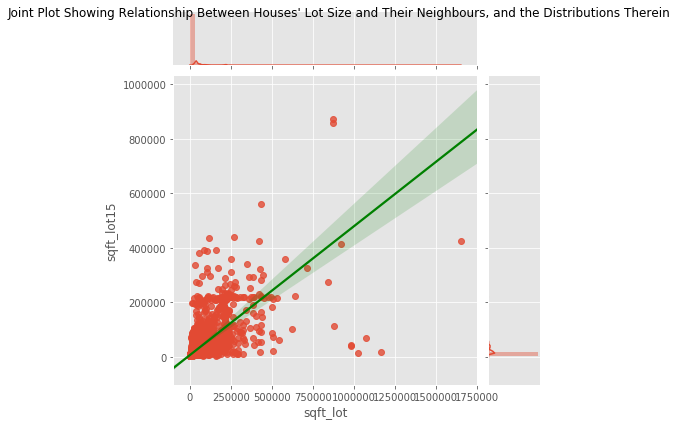

In [31]:
sns.jointplot(x="sqft_lot", y="sqft_lot15",
                  data=kc_df, 
                  kind='reg',
                  joint_kws={'line_kws':{'color':'green'}})
plt.suptitle("Joint Plot Showing Relationship Between Houses' Lot Size and Their Neighbours, and the Distributions Therein")
plt.show()

So it looks like if we took a ratio of sqft_lot15/sqft_lot we would end up with a normal deviation plot around 2.08-ish.<br>
Let's test that now.

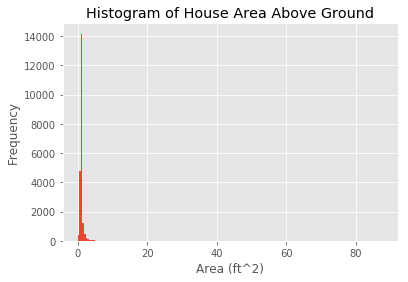

In [32]:
lot15_ratio = np.divide(kc_df.sqft_lot, kc_df.sqft_lot15)
lot15_ratio.hist(bins=200)
plt.title('Histogram of House Area Above Ground')
plt.xlabel("Area (ft^2)")
plt.ylabel('Frequency')
plt.show()

Looking at the plot above, we can see that there is a skewed but still somewhat normal distribution for this ratio.


Now I shall add this data (lot15_ratio), remove sqft_lot15, and remove the other pair-wise correlation problematic columns chosen earlier. I shall name this new dataframe kc_df_mcp. "mcf" standing for multicollinearity fix.

In [33]:
kc_df_mcf = kc_df.drop(['sqft_lot15','sqft_living','sqft_living15','sqft_above'], axis=1)
# New dataframe will have multicollinearity problems removed.
kc_df_mcf['lot15_ratio'] = lot15_ratio
# New dataframe has information on neighbourhood comparison added to it.

<br><br>
#### Location
Now, to contribute to Question C and better understand the features, I shall further explore the location data to consider how best to represent it in my model and understand what it is saying about locations and price. The three location related variables are zipcode, lat, and long.


I shall start by considering zipcodes.

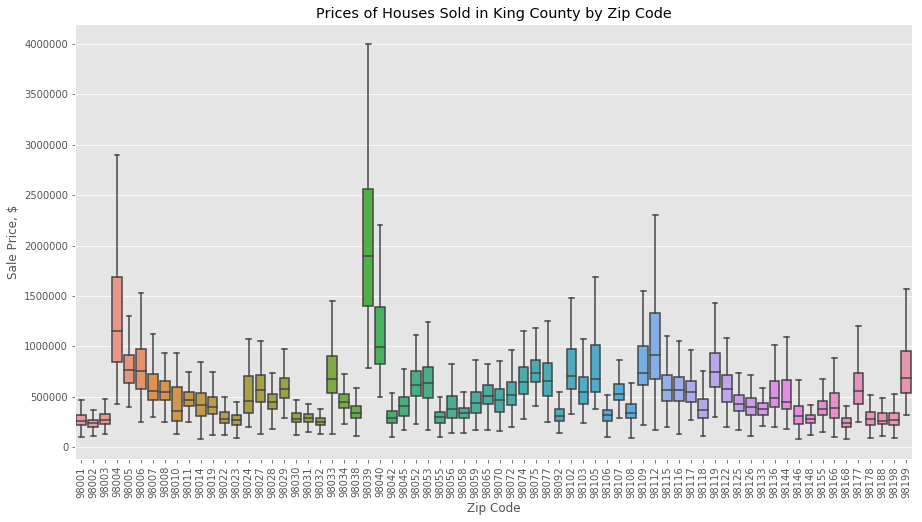

In [34]:
fig = plt.figure(figsize = (15,8))
fig = sns.boxplot(x='zipcode', y='price', data=kc_df_mcf, showfliers = False)
plt.title('Prices of Houses Sold in King County by Zip Code')
plt.xlabel("Zip Code")
plt.xticks(rotation=90)
plt.ylabel('Sale Price, $')
plt.show()

So, as can be seen here, the mean house price for most zip codes doesn't change by relatively much except for those zip codes with a much greater range of high price houses.

The price of houses definitely follows a logarithmic distribution. Once into feature engineering, the price of houses should be logarithmically rescaled. This would hopefully make both our price distributions, and price by zip code distributions, closer to linear. 

I had considered remapping zip codes into our model by a mean price ranking, but this would ultimately just have a similar result to using dummy variables but with less information kept. For this reason one-hot encoding is the best solution for zip codes.

Now onto latitude and longitude. First, I shall plot out prices on a 2D heat map of longitude and latitude so that we can get a feel for our distribution. I have found a useful library for plotting over maps. This will help with our visualisation.

In [35]:
# Import special library for putting images into plots
from imageio import imread
# Find boundary coordinates.
print(min(kc_df_mcf.long))
print(min(kc_df_mcf.lat))
print(max(kc_df_mcf.long))
print(max(kc_df_mcf.lat))

-122.51899999999999
47.1559
-121.315
47.7776


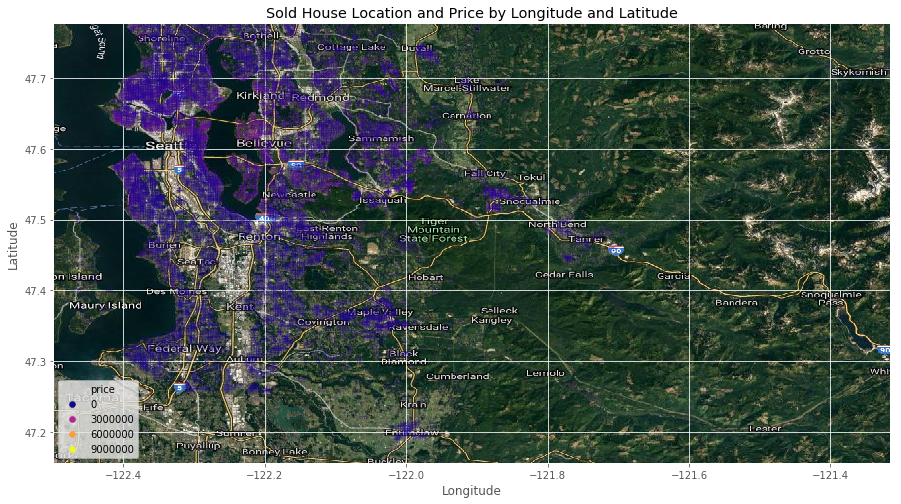

In [36]:
# Create plot. 
fig = plt.figure(figsize = (15,24))
x = kc_df_mcf.long
y = kc_df_mcf.lat
hue = kc_df_mcf.price
# Below we read in a picture I saved into the repository courtesy of Google Maps. Found using the boundary coordinates.
img = imread('King County Google Maps.PNG')
# Start with scatter plot, plus sign markers and some transparency.
fig = sns.scatterplot(x=x, y=y, hue=hue, alpha=0.2, marker="+", palette='plasma')
# Adjust the image to show up on correct coordinates.
plt.imshow(img, zorder=0, extent=[-122.4990, -121.3150, 47.1559, 47.7776])
plt.title('Sold House Location and Price by Longitude and Latitude')
plt.xlabel("Longitude")
plt.ylabel('Latitude')
plt.show()

This is a nice plot. I can see that the higher prices are centred around the Bellevue area. Unfortunately, it is difficult to display see the highest prices because of they are crowded out by the low price colours. We might see a better gradient (though not actual prices) if we make this map again with logarithm scaled prices.

Anyway, the point of making this is to show that there is basically no linear correlation between either latitude or longitude. This can be better shown on another scatter plot.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x504 with 0 Axes>

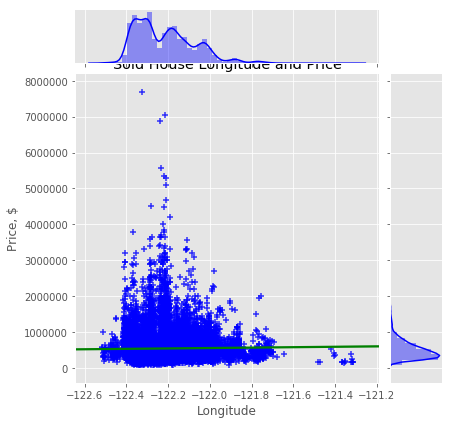

In [37]:
fig = plt.figure(figsize = (10,7))
fig = sns.jointplot(kc_df_mcf.long, kc_df_mcf.price, marker='+', kind='reg', color='blue',
                  joint_kws={'line_kws':{'color':'green'}})
plt.title('Sold House Longitude and Price')
plt.xlabel("Longitude")
plt.ylabel('Price, $')
plt.show()

As you can see in the plot above, while higher prices can be found at longitudes such as -122.2, there can be no useful regression made linearly. The green line is a regression line. The case is similar for the latitude. I am not yet familiar with methods for fitting non-linear regressions, and that is not the purpose of this project, but we could manipulate variables again to make something which could perhaps be more useful.

So, I shall choose to make a new variable using longitude and latitude to represent the radial distance from Bellevue, which seems a prime location. If Bellevue appears to be at coordinates -122.23, 47.63 then the radial distance would be calculated and added to the dataframe like so:

In [38]:
# Note we shall be making a new version of the dataframe and removing the useless vectors for long and lat from it.
kc_df_rad = kc_df_mcf.drop(['long','lat'], axis=1)
kc_df_rad['rad'] = np.sqrt( (kc_df_mcf.long - (-122.23))**2 + (kc_df_mcf.lat - 47.63)**2 )

The usefulness of this new variable will be tested in the modelling step.
<br><br>
#### Feature rescaling
I shall now begin inspecting histograms and correlations more carefully to help with rescaling features for useful normal distributions.

In [39]:
# Let's see a list of our columns left.
kc_df_rad.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lot15_ratio', 'rad'],
      dtype='object')

We won't change date. I doubt it will be useful to us anyway. We can remove it if that seems to be the case in the modelling step.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BBE8908>,
      dtype=object)

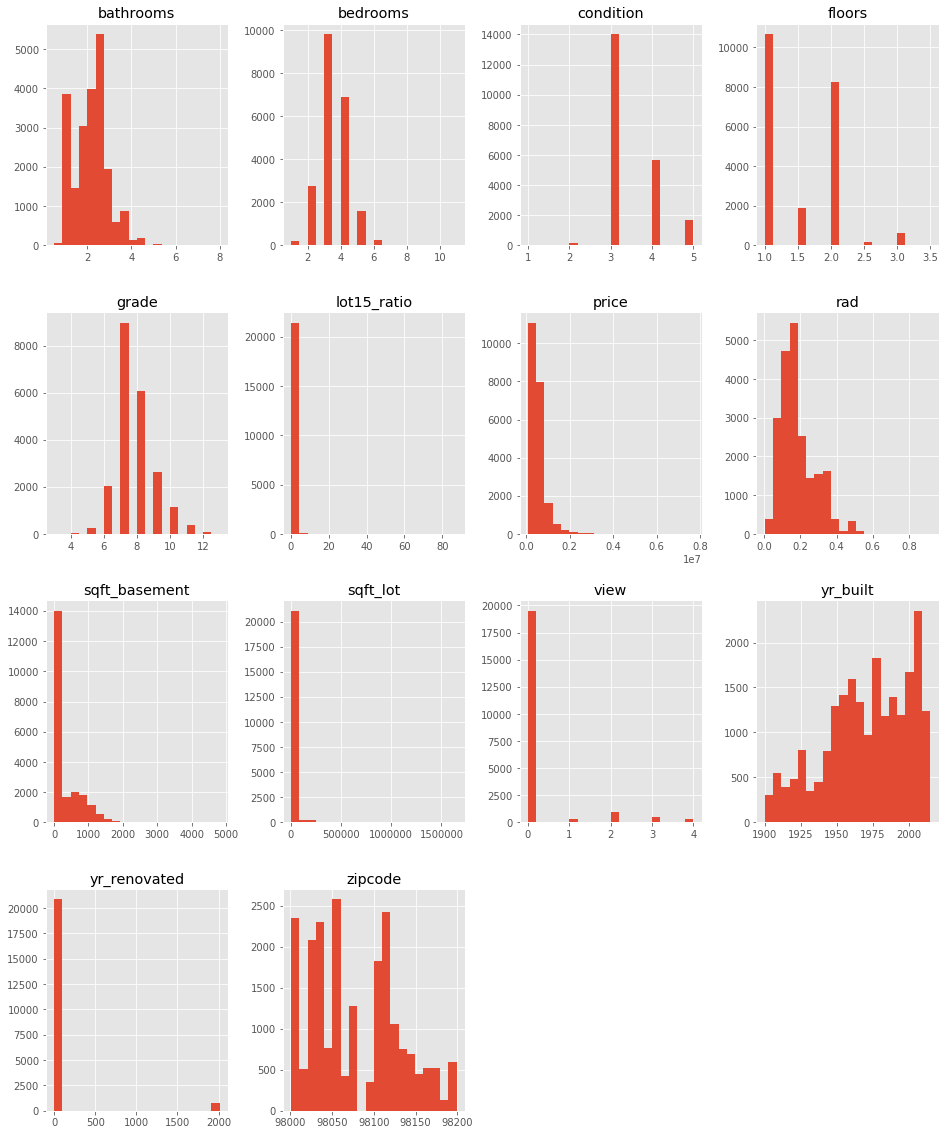

In [40]:
# Let's look at the distributions. "Waterfront" is boolean and is messing up the plotting so that has been excluded.
kc_df_rad.hist(column=['price','bedrooms','bathrooms','sqft_lot','floors',\
                       'view','condition','grade','sqft_basement','yr_built',\
                       'yr_renovated','zipcode','lot15_ratio','rad'], bins=20, figsize=(16,20))

I think I should:<br>
log format bathrooms, price, lot15_ratio, rad, and sqft_lot;<br>
change yr_renovated and sqft_basement to boolean;<br>
one-hot encode floors, view, zipcode.<br><br>
These changes will be made and put into a new dataframe version.

In [41]:
# Log scale some variables
log_bathrooms = np.log(kc_df_rad.bathrooms)
log_price = np.log(kc_df_rad.price)
log_lot15_ratio = np.log(kc_df_rad.lot15_ratio)
log_rad = np.log(kc_df_rad.rad)
log_sqft_lot = np.log(kc_df_rad.sqft_lot)

# Drop old versions from dataframe and add log scaled versions.
kc_df_features = kc_df_rad.drop(['bathrooms','price','lot15_ratio','rad','sqft_lot'], axis=1)
kc_df_features['log_bathrooms'] = log_bathrooms
kc_df_features['log_price'] = log_price
kc_df_features['log_lot15_ratio'] = log_lot15_ratio
kc_df_features['log_rad'] = log_rad
kc_df_features['log_sqft_lot'] = log_sqft_lot

In [42]:
# Add boolean version of yr_renovated and sqft_basement.
kc_df_features['renovated'] = kc_df_features['yr_renovated'].astype(bool)
kc_df_features['basement'] = kc_df_features['sqft_basement'].astype(bool)
# Remove non-boolean options.
kc_df_features.drop('yr_renovated', axis=1, inplace=True)
kc_df_features.drop('sqft_basement', axis=1, inplace=True)

In [43]:
# Create dummy variables for classified variables.
floors_dummy = pd.get_dummies(kc_df_features.floors, prefix="FLOORS")
view_dummy = pd.get_dummies(kc_df_features.view, prefix="VIEW")
zipcode_dummy = pd.get_dummies(kc_df_features.zipcode, prefix="ZIPCODE")

# Remove non-dummy versions.
kc_df_features.drop(['floors','view','zipcode'], axis=1, inplace=True)

# Merge dummy variables onto dataframe.
kc_df_features = pd.concat([kc_df_features, floors_dummy, view_dummy, zipcode_dummy], axis=1)

Now a quick check of the dataframe before I move onto the real modelling step.

In [44]:
kc_df_features.head()

,date,bedrooms,waterfront,condition,grade,yr_built,log_bathrooms,log_price,log_lot15_ratio,log_rad,...,ZIPCODE_98146,ZIPCODE_98148,ZIPCODE_98155,ZIPCODE_98166,ZIPCODE_98168,ZIPCODE_98177,ZIPCODE_98178,ZIPCODE_98188,ZIPCODE_98198,ZIPCODE_98199
0,2014-10-13,3,False,3,7,1955,0.000000,12.309982,0.000000,-2.105132,...,0,0,0,0,0,0,1,0,0,0
1,2014-12-09,3,False,3,7,1951,0.810930,13.195614,-0.053369,-2.061310,...,0,0,0,0,0,0,0,0,0,0
2,2015-02-25,2,False,3,6,1933,0.000000,12.100712,0.215423,-2.226164,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,4,False,5,7,1965,1.098612,13.311329,0.000000,-1.628631,...,0,0,0,0,0,0,0,0,0,0
4,2015-02-18,3,False,3,8,1987,0.693147,13.142166,0.074089,-1.684860,...,0,0,0,0,0,0,0,0,0,0


Everything looks good. I shall move onto modelling now.

## Step 4: Model

##### Aims: Create multivariate linear regression model, iterating for best variables to use or avoid, best split ratio to use, and check for validity.
<br><br>
For the sake of meaningful model intercepts I shall remove one of each encoded dummy variable.

In [45]:
kc_df_features.drop(['FLOORS_1.0','VIEW_0','ZIPCODE_98199'], axis=1, inplace=True)

Now I shall run the first model.

In [46]:
# Running the model did not work due to punctuation in the name of some variables. This is fixed first.
kc_df_features.rename(index=str, columns={"FLOORS_1.5": "FLOORS_1ANDHALF", "FLOORS_2.0": "FLOORS_2",\
                                          "FLOORS_2.5": "FLOORS_2ANDHALF", "FLOORS_3.0": "FLOORS_3",\
                                          "FLOORS_3.5": "FLOORS_3ANDHALF"}, inplace=True)

# Running the model still does not work because of date times automatically being made one-hot encoded.
# In retrospect using dates was never going to work with a linear regression so I must simply remove it.
kc_df_features.drop('date', axis=1, inplace=True)

# Finally, the model is run properly for the first time.
sum_cols = "+".join(kc_df_features.drop('log_price', axis=1).columns)
form = "log_price ~" + sum_cols
model = smf.ols(formula= form, data= kc_df_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1493.
Date:                Sun, 07 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:40:53   Log-Likelihood:                 4489.6
No. Observations:               21596   AIC:                            -8799.
Df Residuals:                   21506   BIC:                            -8081.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.2530      0.175     64.318      0.000      10.910      11.596
waterfront[T.True]     0.4342      0.020     21.396      0.000       0.394       0.474
renovated[T.True]      0.0596      0.008      7.603      0.000       0.044       0.075
basement[T.True]       0.0257      0.003      7.527      0.000       0.019       0.032
bedrooms               0.0356      0.002     19.189      0.000       0.032       0.039
condition              0.0492      0.002     20.845      0.000       0.045       0.054
grade                  0.1673      0.002     90.892      0.000       0.164       0.171
yr_built              -0.0005   8.58e-05     -5.975      0.000      -0.001      -0.000
log_bathrooms          0.1961      0.006     33.213      0.000       0.185       0.208
log_lot15_ratio        0.0055      0.004      1.259      0.208      -0.003       0.014
log_rad               -0.2730      0.010    -27.837      0.000      -0.292      -0.254
log_sqft_lot           0.1047      0.002     43.296      0.000       0.100       0.109
FLOORS_1ANDHALF        0.0681      0.005     12.671      0.000       0.058       0.079
FLOORS_2               0.0756      0.004     17.369      0.000       0.067       0.084
FLOORS_2ANDHALF        0.1251      0.016      7.706      0.000       0.093       0.157
FLOORS_3              -0.0312      0.010     -3.033      0.002      -0.051      -0.011
FLOORS_3ANDHALF       -0.0036      0.075     -0.049      0.961      -0.150       0.143
VIEW_1                 0.1486      0.011     13.305      0.000       0.127       0.171
VIEW_2                 0.1304      0.007     19.198      0.000       0.117       0.144
VIEW_3                 0.2208      0.009     23.902      0.000       0.203       0.239
VIEW_4                 0.3432      0.014     24.535      0.000       0.316       0.371
ZIPCODE_98001         -0.7036      0.017    -41.978      0.000      -0.736      -0.671
ZIPCODE_98002         -0.7022      0.019    -36.675      0.000      -0.740      -0.665
ZIPCODE_98003         -0.6922      0.018    -39.409      0.000      -0.727      -0.658
ZIPCODE_98004         -0.1931      0.024     -8.091      0.000      -0.240      -0.146
ZIPCODE_98005         -0.3731      0.021    -17.579      0.000      -0.415      -0.331
ZIPCODE_98006         -0.3249      0.015    -21.400      0.000      -0.355      -0.295
ZIPCODE_98007         -0.3954      0.021    -18.683      0.000      -0.437      -0.354
ZIPCODE_98008         -0.3170      0.017    -18.796      0.000      -0.350      -0.284
ZIPCODE_98010         -0.4303      0.024    -17.641      0.000      -0.478      -0.382
ZIPCODE_98011         -0.4734      0.019    -25.567      0.000      -0.510      -0.437
ZIPCODE_98014         -0.3986      0.023    -17.471      0.000      -0.443      -0.354
ZIPCODE_98019         -0.4007      0.0

Okay that worked fairly well. The R-squared is 0.861 and most p-values are below 0.05. There are one or two categorical encoded variables which have higher p-values but most of them are fine.

There were two p-values I was not a fan of and they were my custom log_lot15_ratio, and FLOORS_3ANDHALF. In retrospect while I did want the lot ratio to be a success there were some issues with heteroskedasticity from my transformation which were obviously going to be a problem. Oh well, I am happy to remove this. The big floors number variable is the least populated category of floor numbers. I am sure the problem with this was a matter of not having enough data for a meaningful regression. I am happy to remove this.

In [47]:
kc_df_features.drop(['log_lot15_ratio','FLOORS_3ANDHALF'], axis=1, inplace=True)

I shall now try a step-wise selection to see if that suggests any changes to the model dimensions on account of the adjusted R-squared being what we really want to see being optimal. This will run the model repeatedly with increasing numbers of dimensions (steps of 10 from 5 to the independant variable total number) and we can see how the adjusted R-squared and R-squared change with this.

In [48]:
# Need to import some more libraries for this first.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [49]:
# We need to set the dependant and independant variables as separate dataframes for this LinearRegression code.
X = kc_df_features.drop(['log_price'], axis=1)
y = kc_df_features.log_price

# The following code comes courtesy of Flatiron.
r_list = []
adj_r_list = []
list_n = list(range(5,len(X.columns),10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print('r_squared', r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('adjusted_r_squared', adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

r_squared 0.5381591623978375
adjusted_r_squared 0.5362910132035196
r_squared 0.5981781189021026
adjusted_r_squared 0.5965527467775202
r_squared 0.6541371740971533
adjusted_r_squared 0.652738156715084
r_squared 0.7020255356612954
adjusted_r_squared 0.7008202270134682
r_squared 0.8173806613948407
adjusted_r_squared 0.8166419649814759
r_squared 0.82394780494826
adjusted_r_squared 0.8232356726733158
r_squared 0.8273404130963524
adjusted_r_squared 0.8266420039434503
r_squared 0.8516474194412842
adjusted_r_squared 0.8510473322872667
r_squared 0.8600553998402082
adjusted_r_squared 0.8594893230216336


So it looks like the r-squared and adjusted-r-squared only differ by a negligible amount as the dimensions are increased. They also continue to increase with dimensions, implying that I should use lots of dimensions in our model. This would mean using still quite a few features, and I do not know if there is overfitting going on for this case.

In order to investigate further I shall try to find the best train-test ratio to use for this case of many dimensions being kept.

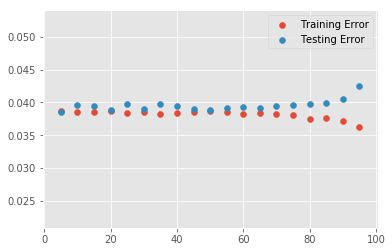

In [50]:
# This code is also courtesy of Flatiron. It will display the mean squared error for test and train sets.
# The sets are repeated 10 times to average out noise when using random splits. This is done across a range of split ratios.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

This is good. It appears that while there is some overfitting when over 80% of the data set is used for training the amount is quite low. I am happy with the amount of dimensions being used, as even with all the data being used for training the mean squared error should remain low.

This diagram does however seem to be showing that whether we use a 5% split or a 50% split doesn't make much of a difference. But because, as I mentioned earlier, this uses a mean of random splits we cannot be completely sure if either of these low error values is representative of what we might achieve with a single sample.

This means that even though I may be happy with the level of error for the full data set, I could in reality be getting much higher or lower error values by chance when testing against new data.

I can check the distribution of possible error values by using a k-fold cross validation. I will be using this to find the (negative) mean squared error across k=10 non-random train-test cuts of the data set.

In [51]:
from sklearn.model_selection import cross_val_score

cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.03853435, -0.0406515 , -0.03785805, -0.03907474, -0.03767945,
       -0.04002056, -0.03719672, -0.0395554 , -0.03969817, -0.04346692])

This shows quite a small distribution in mean squared errors, around the mean. None of these numbers are too high. This means I can trust using all the dimensions I have left without being concerned about overfitting. Underfitting is not a concern with this data.

I will now run the model again with these final chosen dimensions so we can see the final results of the statistics.

In [52]:
sum_cols = "+".join(kc_df_features.drop('log_price', axis=1).columns)
form = "log_price ~" + sum_cols
model = smf.ols(formula= form, data= kc_df_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1527.
Date:                Sun, 07 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:42:41   Log-Likelihood:                 4488.8
No. Observations:               21596   AIC:                            -8802.
Df Residuals:                   21508   BIC:                            -8099.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.2446      0.175     64.338      0.000      10.902      11.587
waterfront[T.True]     0.4338      0.020     21.377      0.000       0.394       0.474
renovated[T.True]      0.0594      0.008      7.580      0.000       0.044       0.075
basement[T.True]       0.0257      0.003      7.540      0.000       0.019       0.032
bedrooms               0.0356      0.002     19.206      0.000       0.032       0.039
condition              0.0490      0.002     20.808      0.000       0.044       0.054
grade                  0.1671      0.002     91.001      0.000       0.164       0.171
yr_built              -0.0005   8.58e-05     -5.992      0.000      -0.001      -0.000
log_bathrooms          0.1963      0.006     33.275      0.000       0.185       0.208
log_rad               -0.2733      0.010    -27.880      0.000      -0.293      -0.254
log_sqft_lot           0.1060      0.002     48.931      0.000       0.102       0.110
FLOORS_1ANDHALF        0.0683      0.005     12.714      0.000       0.058       0.079
FLOORS_2               0.0757      0.004     17.453      0.000       0.067       0.084
FLOORS_2ANDHALF        0.1255      0.016      7.733      0.000       0.094       0.157
FLOORS_3              -0.0306      0.010     -2.984      0.003      -0.051      -0.011
VIEW_1                 0.1485      0.011     13.291      0.000       0.127       0.170
VIEW_2                 0.1304      0.007     19.193      0.000       0.117       0.144
VIEW_3                 0.2207      0.009     23.893      0.000       0.203       0.239
VIEW_4                 0.3431      0.014     24.524      0.000       0.316       0.370
ZIPCODE_98001         -0.7040      0.017    -42.004      0.000      -0.737      -0.671
ZIPCODE_98002         -0.7025      0.019    -36.690      0.000      -0.740      -0.665
ZIPCODE_98003         -0.6926      0.018    -39.439      0.000      -0.727      -0.658
ZIPCODE_98004         -0.1947      0.024     -8.170      0.000      -0.241      -0.148
ZIPCODE_98005         -0.3744      0.021    -17.666      0.000      -0.416      -0.333
ZIPCODE_98006         -0.3257      0.015    -21.480      0.000      -0.355      -0.296
ZIPCODE_98007         -0.3961      0.021    -18.723      0.000      -0.438      -0.355
ZIPCODE_98008         -0.3177      0.017    -18.852      0.000      -0.351      -0.285
ZIPCODE_98010         -0.4320      0.024    -17.736      0.000      -0.480      -0.384
ZIPCODE_98011         -0.4741      0.019    -25.619      0.000      -0.510      -0.438
ZIPCODE_98014         -0.4008      0.023    -17.618      0.000      -0.445      -0.356
ZIPCODE_98019         -0.4019      0.019    -20.764      0.000      -0.440      -0.364
ZIPCODE_98022         -0.5757      0.020    -28.472      0.000      -0.615      -0.536
ZIPCODE_98023         -0.7058      0.0

## Step 5: Interpret

##### Aims: Discuss predictive power and reliability of model, how do some coefficients impact price, answer questions, and discuss proposals for future improvements to the model.  

#### Is the model reliable?

This model is quite succesful in its predictive ability. The R-squared measure for the model is 0.861. This means that 86.1% of the variance in the points can be explained by the model. Also, almost all of the coefficients have p-values rounding to 0.000. This means that almost all coefficients being used used have almost no probability of being the result of regression over randomly distributed data points with no underlying relationship to the target. Only a few coefficients have p-values higher than 0.000 and these are still low enough to be implying strong statistical significance of relationships.

<br><br>
#### Examples of variable coefficients

I shall now consider how the model describes the effect of a few variables on price, starting with the number of bathrooms.

##### Number of bathrooms
The variable for number of bathrooms, and the target variable for price, were both log scaled. This means that if the coefficient for log(#bathrooms) is 0.1963 then

$$0.1963=d log(price) / d log(#bathrooms)$$

This means that houses with double the number of bathrooms would be expected to sell for another 14.6% plus or minus 0.4%. Of course, the relationship would not necessarily mean that increasing bathrooms would have a causal effect, but for houses with half-bathrooms it could strongly suggest a good way of improving the price.

#####  Renovation
Another variable worth looking at is our boolean varible for renovated houses. The renovated variable is not log scaled so exponentiating the coefficient and reducing by one will give us the percentage increase in price for when renovated=True. This shows that the average increase in price our model suggests is 6.12%. It is worth noting that again this does not mean renovating your house would cause a 6% increase in price. Our model could be biased by the fact that those houses which were renovated were older houses more in need of repair beforehand. A newer house might have much less to gain by being renovated.

##### Grade
Another variable worth considering is the grade of the house. This is the grade assigned by the government representing the quality of the property. The coefficient for grade is 0.1671, so for a one unit increase in grade we would expect an 18.2% increase in price. As with the previous relationships, this does not imply causality, but the variable "grade" is perhaps one of the easiest for house owners to change.

<br><br>
#### Question A: What can be inferred about this data set from its exposure to misfitting?

As we saw in the plot for train-test split mean square errors over different splits, there was a largely flat line of low values up until about 80% training, where the train and test values began to diverge by a small amount. This tells us a few things. 

1) The data set is large enough that even with only a small percentage of the set being used we still get a model which can be used effectively at large scales. 

2) The data is quite linear as underfitting was not a problem. 

3) Overfitting does exist in the model (as can also be noticed in the k-folds cross validation distribution) but the effect of it is well within tolerance. This means that while idiosyncracies in the data do exist, such as expected price difference by zip code, the data set is generally large enough to contain a good distribution of data points in any of these idiosyncratic variables. i.e. Most variables we ended up using were well filled with data points, so the data set does seem to include a good cross section of houses sold in King County.
<br><br>

#### Question B: Where are the higher valued houses in King County located AND how best can I improve my model with location related data?
As we saw in the heat scatter graph with map background I made earlier, most of the higher valued houses are located around Bellevue and other coastal areas around northern Seattle. We can also look at our dimensions from the model to see that the zip codes most strongly relating to higher prices (most positive coefficients) are 98109 and 98119. A quick google search confirms that these are in central north Seattle, just west of Bellevue. The difference between these zip codes and Bellevue would be that these positive coefficients imply the price for houses in these areas are higher than they would otherwise be, whereas houses in Bellevue may be already correctly priced for their other attributes.

As we saw earlier using latitude and longitude does not work with linear regression models. This data would still be very effective in a regression model of some sort if it could be made to work non-linearly. The "radial degrees/distance from Bellevue" variable I created seemed to work quite well as it had a zero p-value, but trying a different non-linear transformation function might show better results. Using zipcodes one-hot encoded also seemed to work well but for a couple zip codes we came close to lacking enough data to be reliable. This may not be such a big problem if most of the people who could get use from this model didn't live in those areas anyway.
<br><br>

#### Question C: How much more accurate can a price prediction be based on a multivariate linear regression rather than just the government assigned "grade"?
The government assigned "grade" is strongly correlated with price, and as I saw earlier when checking anomalous prices, the highest value houses have the highest grades. Clearly, grade is a good indicator of price. I shall now run a quick regression of just log(price) against grade and we shall see how the R-squared measures compare.

In [53]:
form = "log_price ~ grade"
model = smf.ols(formula= form, data= kc_df_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 2.119e+04
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:49:46   Log-Likelihood:                -9408.8
No. Observations:               21596   AIC:                         1.882e+04
Df Residuals:                   21594   BIC:                         1.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6294      0.017    632.296      0.000      10.596      10.662
grade          0.3159      0.002    145.563      0.000       0.312       0.320
==============================================================================
Omnibus:                      130.456   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.880
Skew:                           0.181   Prob(JB):                     8.48e-30
Kurtosis:                       3.131   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Very interesting. As we can see, the R-squared is about 43% lower than my model. I would not be interested in relying on a model with an R-squared measure of 0.495. While the p-value for the grade variable is roughly 0, indicating that grade does have positive relationship with price, my model is almost twice as accurate as using just grade.
<br><br>

#### Suggestions for future improvements to the model
Being able to use non-linear modelling techniques for variables which were thrown out, such as latitude, longitude, and date, would make a big difference as it is reasonable to expect these do influence sale prices significantly. 

If we also knew of ways to use more of the variables which were thrown out for being too highly correlated to other variables, such as sqft15_lot, we could also make use of valuable data. We also still had a fair amount of multicorrelation biases influencing the model as I only tried to remove correlating variables over a tolerance of 70%. I am sure there is a way of managing these better, or transforming relationships into other variables, like I attempted with sqft15_ratio. 